## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [4]:
# 1

import pandas as pd
#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

# 2

I selected a compact set of nine variables: 'year', 'id', 'age', 'hrs1', 'marital', 'sibs', 'educ', 'race', and 'wrkstat'. These variables offer a focused snapshot of respondents’ lives, enabling the study of trends over time and the examination of relationships between key social indicators.

The 'year' variable provides the temporal context, making it possible to analyze changes across different survey waves. 'id' serves as a unique identifier for each respondent, ensuring the integrity of individual records. The 'age' variable is essential for understanding generational differences and life stage effects. 'hrs1' captures the number of hours worked in the previous week, offering insights into labor market participation and work intensity. The 'marital' status variable reflects familial and social relationships, while 'sibs' indicates family size during upbringing, which may influence social behavior.

In addition, 'educ' represents the highest level of education achieved, a key factor in socioeconomic analysis, and 'race' provides demographic diversity information, helping to uncover potential disparities. Finally, 'wrkstat' indicates employment status, further deepening the analysis of labor market outcomes. Together, these variables create a manageable yet informative dataset, supporting research into how demographic factors, education, and employment interact to shape social trends and individual life outcomes. This focused dataset is ideal for exploring social stratification, policy impacts, and the evolving relationship between work, education, and family life thoroughly.

In [70]:
# 3
df1 = pd.read_parquet('/content/gss_chunk_1.parquet')
df2 = pd.read_parquet('/content/gss_chunk_2.parquet')
df3 = pd.read_parquet('/content/gss_chunk_3.parquet')

df = pd.concat([df1, df2, df3])

In [73]:
var = ['year', 'id', 'age','hrs1', 'marital', 'sibs', 'educ', 'race', 'wrkstat']

df = df[var]

df.head(50)

,year,id,age,hrs1,marital,sibs,educ,race,wrkstat
0,1972,1,23,NaN,never married,3,16.0,white,working full time
1,1972,2,70,NaN,married,4,10.0,white,retired
2,1972,3,48,NaN,married,5,12.0,white,working part time
3,1972,4,27,NaN,married,5,17.0,white,working full time
4,1972,5,61,NaN,married,2,12.0,white,keeping house
5,1972,6,26,NaN,never married,1,14.0,white,working full time
6,1972,7,28,NaN,divorced,7,13.0,white,working full time
7,1972,8,27,NaN,never married,1,16.0,white,working full time
8,1972,9,21,NaN,never married,2,12.0,black,working part time
9,1972,10,30,NaN,married,7,12.0,black,working full time


In [75]:
import numpy as np

# Define the conditions for each education level
conditions = [
    (df['educ'] < 9),
    ((df['educ'] > 8) & (df['educ'] < 12)),
    (df['educ'] == 12),
    ((df['educ'] > 12) & (df['educ'] < 16)),
    (df['educ'] == 16),
    (df['educ'] > 16)
]

# Define the corresponding labels for each condition
choices = [
    'Middle school or Less',
    'Some High school',
    'High school Graduate',
    'Some College',
    'College Graduate',
    'Post-Bachelors'
]

# Create the new categorical variable
df['educ_cat'] = np.select(conditions, choices, default='Unknown')

# Converting floats to int to categorical
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')
df['sibs'] = pd.to_numeric(df['sibs'], errors='coerce').astype('Int64')

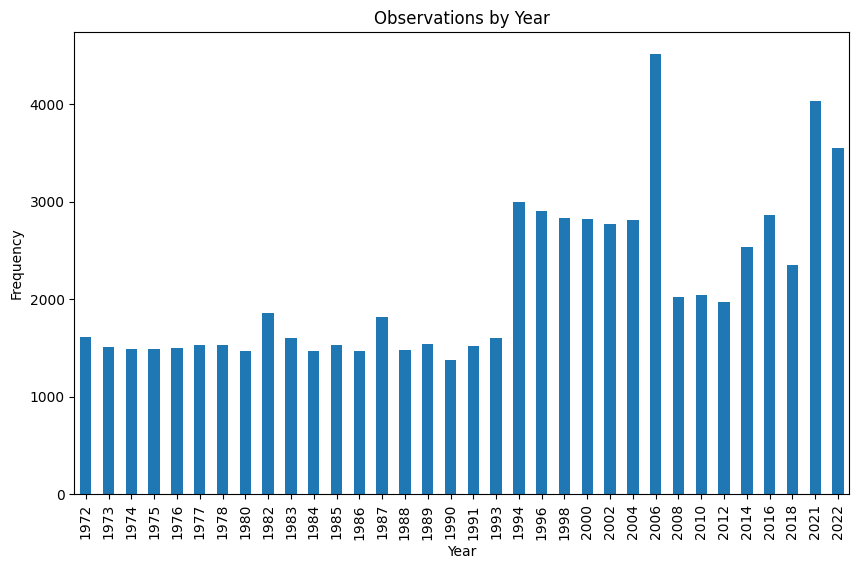

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Observations by year
year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Observations by Year')
plt.show()

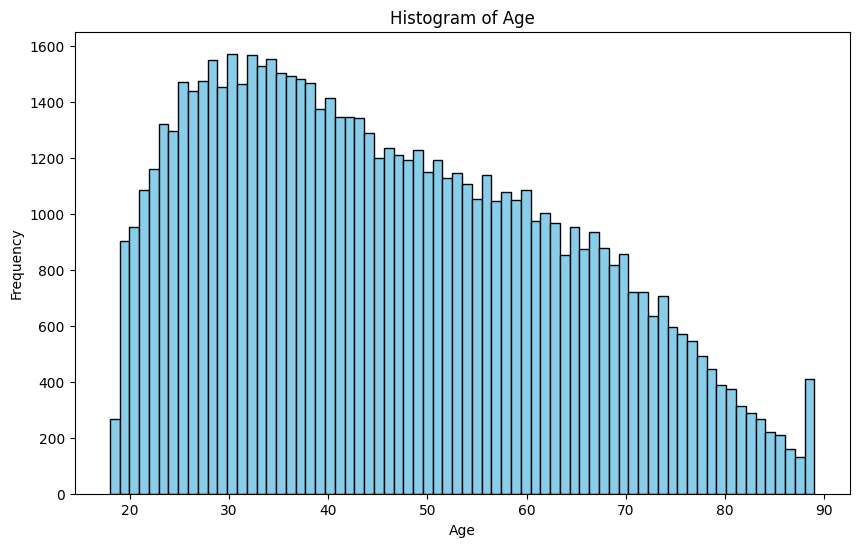

In [90]:
plt.figure(figsize=(10,6))
plt.hist(df['age'].dropna(), bins=72, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

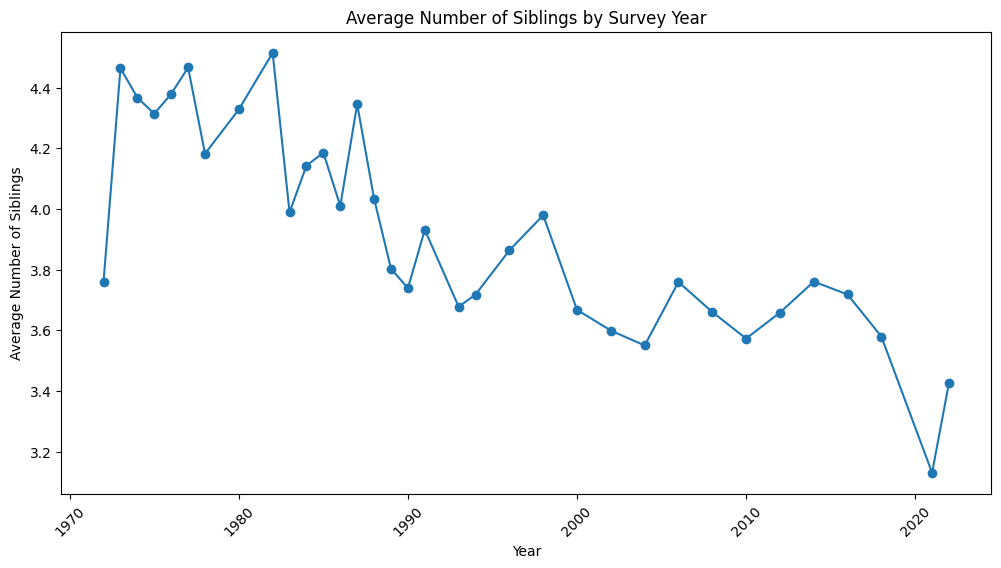

In [56]:
mean_sibs = df.groupby('year')['sibs'].mean().sort_index()

plt.figure(figsize=(12,6))
plt.plot(mean_sibs.index, mean_sibs.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Number of Siblings')
plt.title('Average Number of Siblings by Survey Year')
plt.xticks(rotation=45)
plt.show()

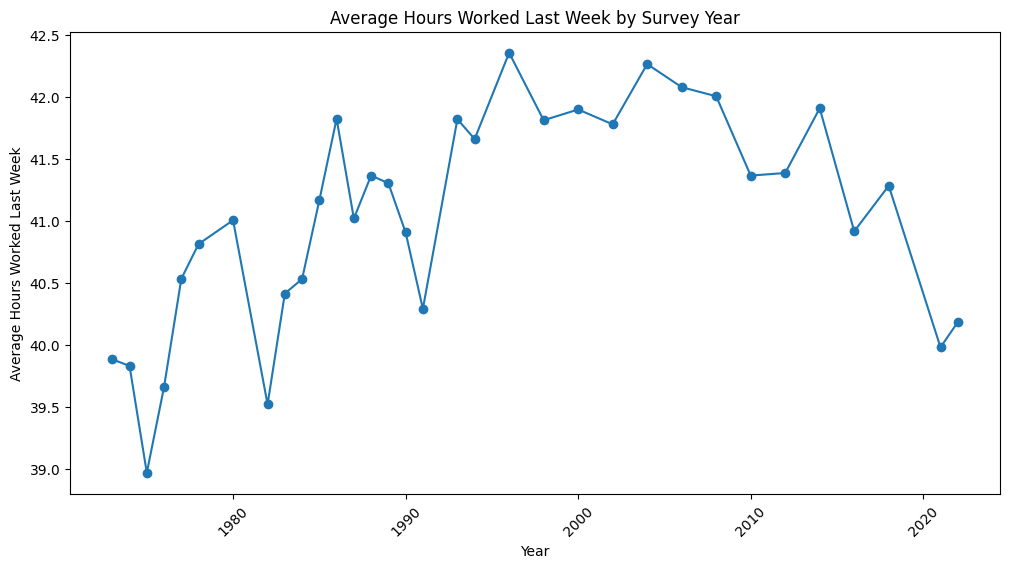

In [57]:
# Calculate the mean hours worked for each year
mean_hrs1 = df.groupby('year')['hrs1'].mean().sort_index()

plt.figure(figsize=(12,6))
plt.plot(mean_hrs1.index, mean_hrs1.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Hours Worked Last Week')
plt.title('Average Hours Worked Last Week by Survey Year')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

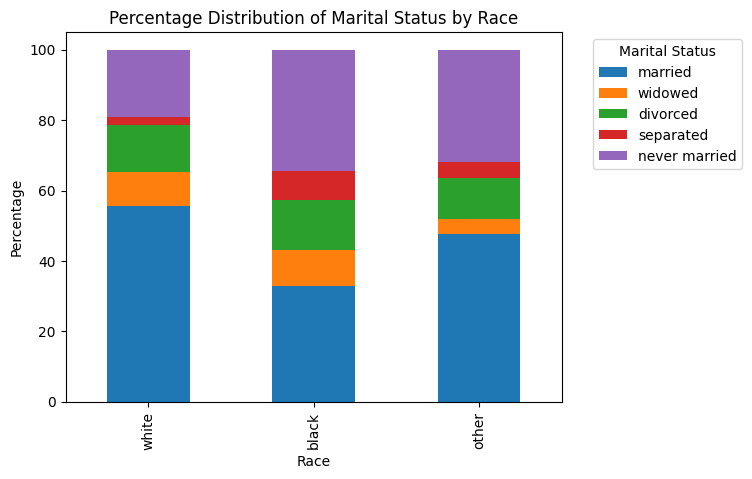


 marital  married  widowed  divorced  separated  never married
race                                                         
white      55.70     9.61     13.24       2.46          18.99
black      32.95    10.11     14.34       8.02          34.58
other      47.66     4.18     11.85       4.54          31.77


In [65]:
race_marital = pd.crosstab(df['race'], df['marital'], normalize='index') * 100

plt.figure(figsize=(12,6))
race_marital.plot(kind='bar', stacked=True)
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Marital Status by Race')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print('\n', round(race_marital, 2))

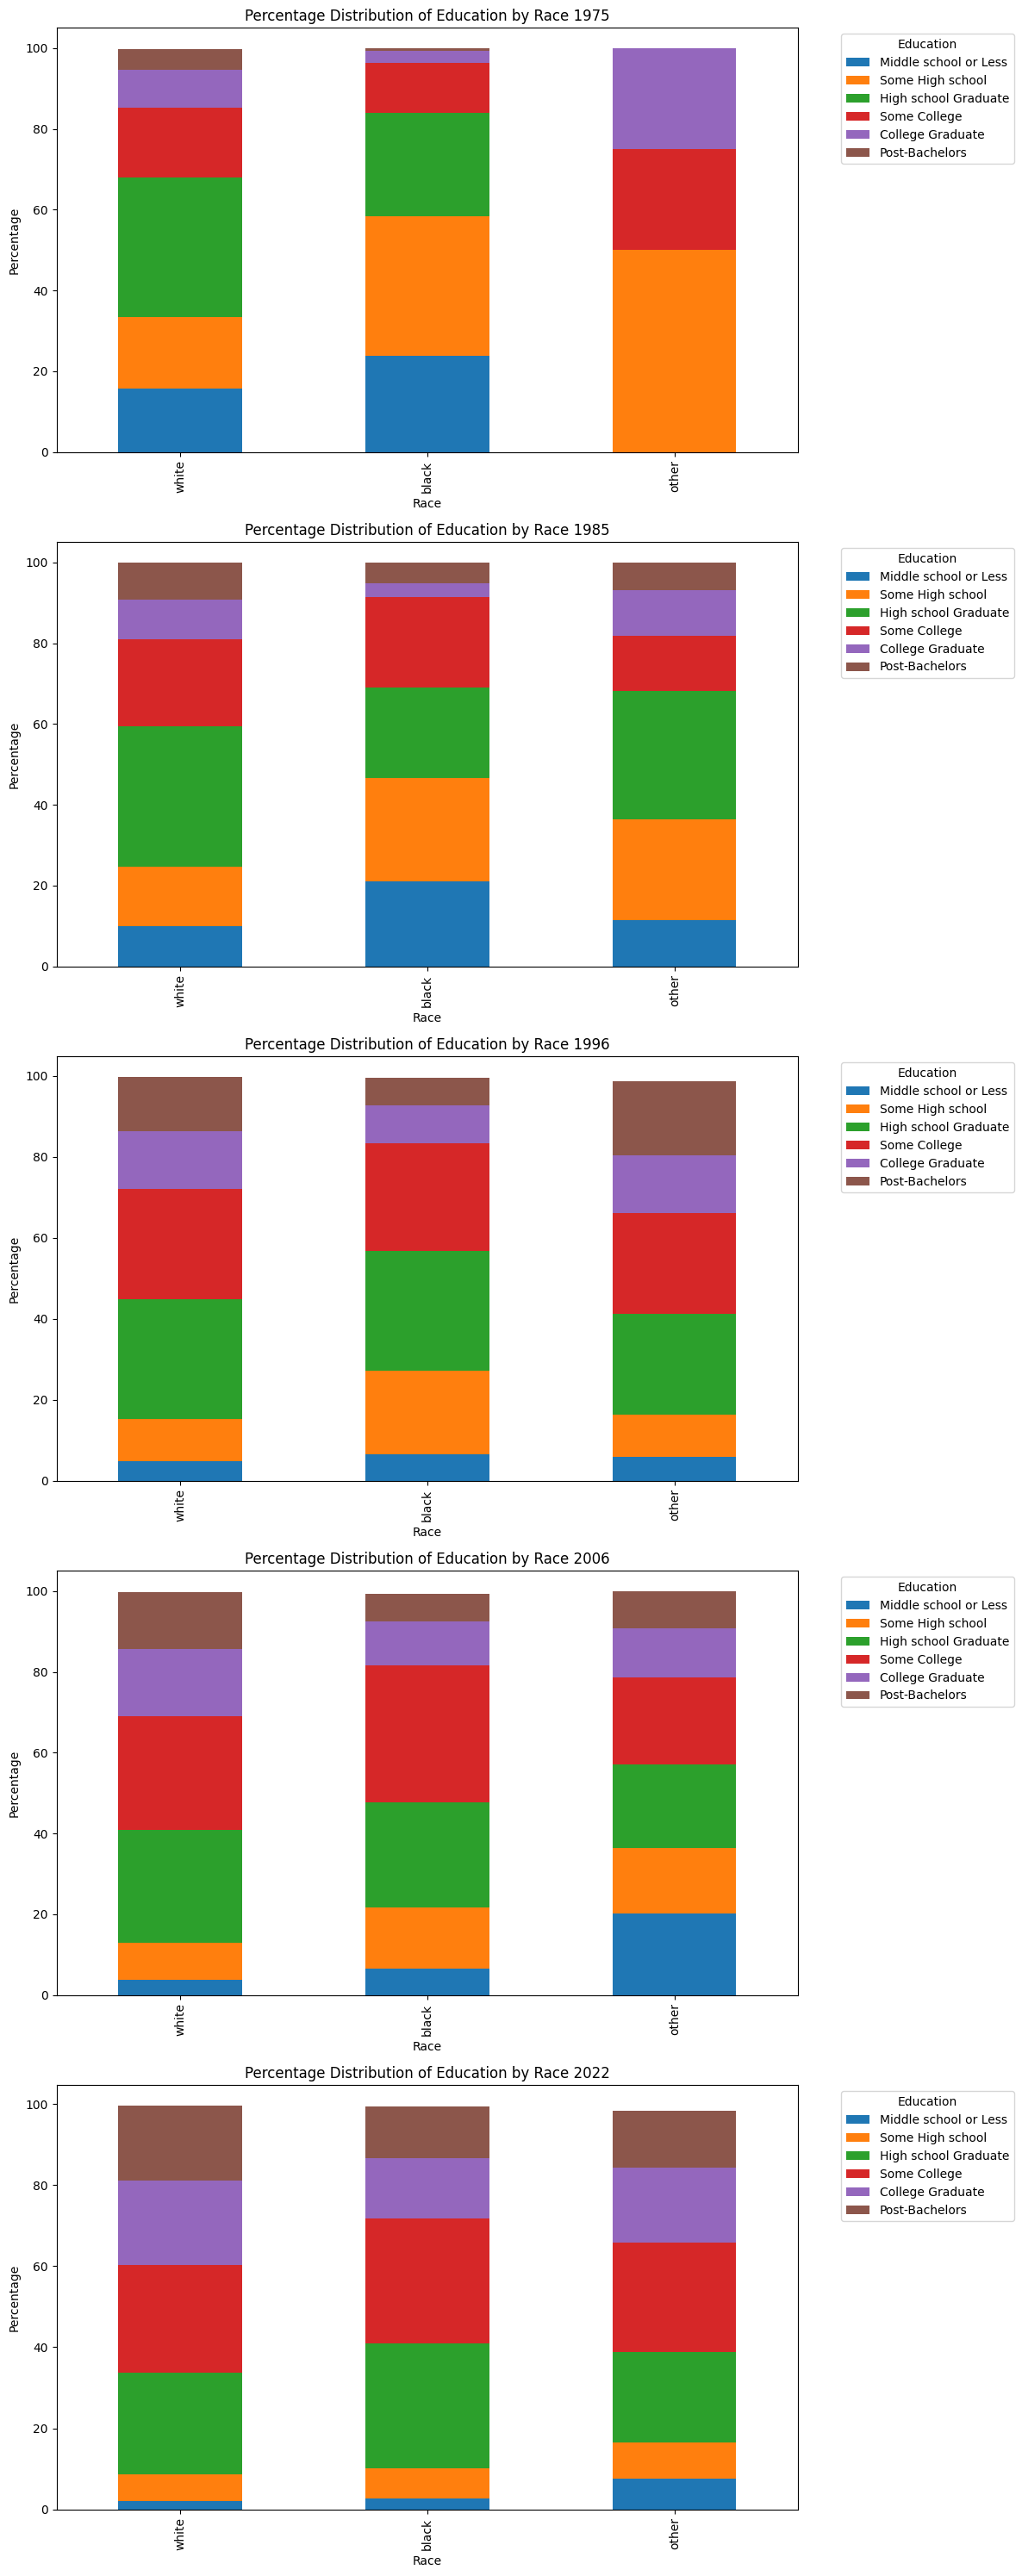


Summary for 1975:
 educ_cat  Middle school or Less  Some High school  High school Graduate  \
race                                                                      
white                     15.65             17.69                 34.54   
black                     23.93             34.36                 25.77   
other                      0.00             50.00                  0.00   

educ_cat  Some College  College Graduate  Post-Bachelors  
race                                                      
white            17.31              9.52            5.06  
black            12.27              3.07            0.61  
other            25.00             25.00            0.00  

Summary for 1985:
 educ_cat  Middle school or Less  Some High school  High school Graduate  \
race                                                                      
white                      9.87             14.87                 34.60   
black                     21.05             25.66               

In [85]:
# Define the selected years
selected_years = [1975, 1985, 1996, 2006, 2022]

# Prepare a dictionary to store numerical summaries for each year
summary_dict = {}

# Create subplots – one row per year
fig, axes = plt.subplots(len(selected_years), 1, figsize=(12, 6 * len(selected_years)))

edu_categories = ['Middle school or Less', 'Some High school', 'High school Graduate',
                  'Some College', 'College Graduate', 'Post-Bachelors']

# Loop over the selected years to filter data, create crosstabs, and plot
for i, year in enumerate(selected_years):
    df_year = df[df['year'] == year]
    # Create a percentage-based crosstab for education categories by race
    race_ed = pd.crosstab(df_year['race'], df_year['educ_cat'], normalize='index') * 100
    race_ed = race_ed.reindex(columns=edu_categories)
    # Save the numerical summary rounded to 2 decimals
    summary_dict[year] = round(race_ed, 2)

    # Plot the stacked bar chart on the corresponding subplot
    race_ed.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_xlabel('Race')
    axes[i].set_ylabel('Percentage')
    axes[i].set_title(f'Percentage Distribution of Education by Race {year}')
    axes[i].legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print out the numerical summaries for each year
for year in selected_years:
    print(f"\nSummary for {year}:\n", summary_dict[year])

# 5

I began my exploratory data analysis by examining the distribution of observations across survey years. Initially, there was a relatively even distribution, with an average of about 1700 observations per year. However, in 1994, there was a notable spike to around 3000 observations. This increase coincided with the survey’s transition to an every-other-year format, leading to more variable response counts thereafter, although the overall average remained near 3000 per survey year.

Next, I analyzed the age distribution within the dataset. When graphing the data, the age distribution did not match the typical bimodal pattern seen in U.S. age density charts—where one peak appears around 20–29 years and another near 60 years. Instead, the distribution was right-skewed with a pronounced concentration around age 30. This skew may be exaggerated by the exclusion of respondents younger than 18, and it could also reflect a lower survey response rate among older individuals.

Finally, I explored yearly trends for the number of siblings and hours worked per week. My initial hypothesis was that these variables would show an inverse relationship: as the number of siblings decreased over time, the average hours worked per week would increase. While the number of siblings did decline over time, the trend for hours worked deviated from expectations. Hours worked per week increased and peaked during the late 1990s and early 2000s, then declined by about 2.5 hours, stabilizing at the current standard of 40 hours per week.

In the final visualizations, I segmented the data by race. However, it's important to note that the GSS categorizes race into only three groups—White, Black, and Other—which by no means fully captures the diversity of racial identities and therefore makes any conclusions involving 'Other' meaningless. In the marital status bar graph, the data reveal that White respondents are significantly more likely to be married than Black respondents, although the divorce rates are strikingly similar across these groups. When examining educational attainment tracked at 10-year intervals, a clear upward trend emerges: as we approach the present day, overall education levels have increased for all racial groups. Nonetheless, a persistent gap remains between Black and White respondents, highlighting the need for targeted policy interventions to promote greater educational equity.